In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


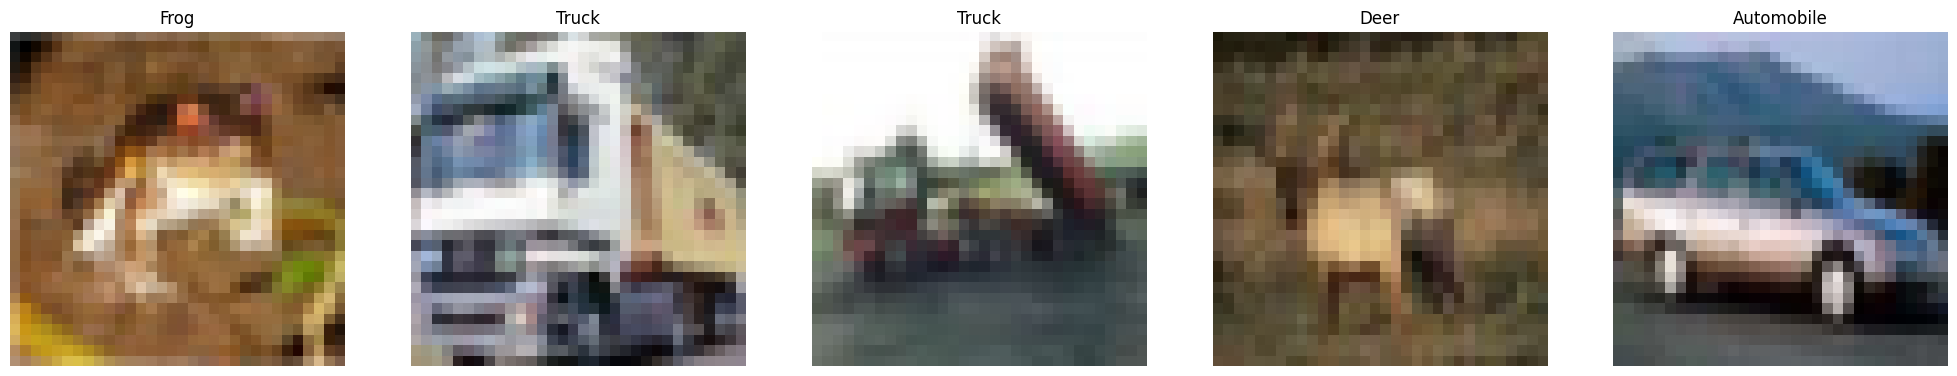

In [3]:
# gorsellestirme
class_labels = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

# bazi goruntuleri ve etiketlerini gorsellestirme
fig, axes = plt.subplots(1, 5, figsize=(25, 20))

for i in range(5):
  axes[i].imshow(x_train[i])
  label = class_labels[int(y_train[i])]
  axes[i].set_title(label)
  axes[i].axis('off')

plt.show()

In [4]:
# veri seti normalizasyonu
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

In [5]:
# one-hot encoding
y_train = to_categorical(y_train, 10) # 10 class oldugu icin 10 yazdik
y_test = to_categorical(y_test, 10)

In [6]:
# Veri arttirimi (Data Augmentation)
datagen = ImageDataGenerator(
    rotation_range = 20, # 20 dereceye kadar dondurme saglar
    width_shift_range = 0.2, # goruntuyu yatayda yuzde 20 kaydirma
    height_shift_range = 0.2, # goruntuyu dikeyde yuzde 20 kaydirma
    shear_range = 0.2, # goruntu uzerinde kaydirma
    zoom_range = 0.2, # goruntuye zoom uygulama
    horizontal_flip = True, # goruntuyu yatayda ters cevirme
    fill_mode = "nearest" # bos alanlari doldurmak icin en yakin pixel degerlerini kullan
    )

datagen.fit(x_train) # data augmentation'i egitim verileri uzerinde uygula

In [7]:
model = Sequential()
# 1. CNN Bloğu
model.add(Conv2D(32, (3,3), padding="same", activation="relu", input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2. CNN Bloğu
model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# 3. CNN Bloğu
model.add(Conv2D(128, (3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

# Fully Connected Kısım
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(10, activation="softmax"))

# Modeli derleme
model.compile(optimizer=RMSprop(learning_rate=0.0001, decay=1e-7),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 15, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 15, 15, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 6, 6, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 6, 6, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 555,690 (2.12 MB)

 Trainable params: 555,242 (2.12 MB)

 Non-trainable params: 448 (1.75 KB)

In [8]:
early_stopping = EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True)
check_point = ModelCheckpoint("cnn_best_model.h5", monitor="val_loss", save_best_only=True)

In [9]:
# model training
history = model.fit(datagen.flow(x_train, y_train, batch_size=128),
                    epochs=100,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping, check_point],
                    verbose=1)

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.1745 - loss: 2.5494

391/391 ━━━━━━━━━━━━━━━━━━━━ 56s 115ms/step - accuracy: 0.1746 - loss: 2.5486 - val_accuracy: 0.1490 - val_loss: 2.2743
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.2789 - loss: 1.9115

391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 86ms/step - accuracy: 0.2790 - loss: 1.9114 - val_accuracy: 0.3997 - val_loss: 1.6358
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.3284 - loss: 1.7834

391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 90ms/step - accuracy: 0.3284 - loss: 1.7833 - val_accuracy: 0.3919 - val_loss: 1.6235
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.3722 - loss: 1.6932

391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 88ms/step - accuracy: 0.3722 - loss: 1.6931 - val_accuracy: 0.4360 - val_loss: 1.5094
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 85ms/step - accuracy: 0.3960 - loss: 1.6254 - val_accuracy: 0.4320 - val_loss: 1.5266
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 88ms/step - accuracy: 0.4202 - loss: 1.5701 - val_accuracy: 0.4113 - val_loss: 1.6212
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.4495 - loss: 1.5134

391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 88ms/step - accuracy: 0.4495 - loss: 1.5133 - val_accuracy: 0.4549 - val_loss: 1.4790
Epoch 8/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 86ms/step - accuracy: 0.4635 - loss: 1.4734 - val_accuracy: 0.4044 - val_loss: 1.7313
Epoch 9/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 88ms/step - accuracy: 0.4814 - loss: 1.4315 - val_accuracy: 0.4561 - val_loss: 1.5440
Epoch 10/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.4981 - loss: 1.3904

391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 89ms/step - accuracy: 0.4981 - loss: 1.3904 - val_accuracy: 0.5094 - val_loss: 1.3426
Epoch 11/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 88ms/step - accuracy: 0.5081 - loss: 1.3620 - val_accuracy: 0.4890 - val_loss: 1.4135
Epoch 12/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 89ms/step - accuracy: 0.5222 - loss: 1.3323 - val_accuracy: 0.4757 - val_loss: 1.5222
Epoch 13/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.5277 - loss: 1.3121

391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 86ms/step - accuracy: 0.5277 - loss: 1.3121 - val_accuracy: 0.5481 - val_loss: 1.2668
Epoch 14/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.5385 - loss: 1.2950

391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 89ms/step - accuracy: 0.5385 - loss: 1.2950 - val_accuracy: 0.5385 - val_loss: 1.2569
Epoch 15/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 89ms/step - accuracy: 0.5417 - loss: 1.2751 - val_accuracy: 0.4826 - val_loss: 1.5297
Epoch 16/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 89ms/step - accuracy: 0.5498 - loss: 1.2517 - val_accuracy: 0.5223 - val_loss: 1.4207
Epoch 17/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.5621 - loss: 1.2257

391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 86ms/step - accuracy: 0.5621 - loss: 1.2257 - val_accuracy: 0.5647 - val_loss: 1.2045
Epoch 18/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 89ms/step - accuracy: 0.5663 - loss: 1.2144 - val_accuracy: 0.5187 - val_loss: 1.3727
Epoch 19/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 90ms/step - accuracy: 0.5719 - loss: 1.1997 - val_accuracy: 0.5587 - val_loss: 1.2778
Epoch 20/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.5791 - loss: 1.1879

391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 88ms/step - accuracy: 0.5791 - loss: 1.1879 - val_accuracy: 0.5840 - val_loss: 1.1756
Epoch 21/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.5829 - loss: 1.1761

391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 87ms/step - accuracy: 0.5829 - loss: 1.1761 - val_accuracy: 0.5936 - val_loss: 1.1504
Epoch 22/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 88ms/step - accuracy: 0.5912 - loss: 1.1456 - val_accuracy: 0.5853 - val_loss: 1.2028
Epoch 23/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 88ms/step - accuracy: 0.5924 - loss: 1.1486 - val_accuracy: 0.5913 - val_loss: 1.2441
Epoch 24/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.6025 - loss: 1.1372

391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 89ms/step - accuracy: 0.6025 - loss: 1.1372 - val_accuracy: 0.6048 - val_loss: 1.1312
Epoch 25/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.6062 - loss: 1.1242

391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 87ms/step - accuracy: 0.6062 - loss: 1.1242 - val_accuracy: 0.6098 - val_loss: 1.1250
Epoch 26/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.6139 - loss: 1.0927

391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 88ms/step - accuracy: 0.6139 - loss: 1.0927 - val_accuracy: 0.6118 - val_loss: 1.1163
Epoch 27/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.6202 - loss: 1.0811

391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 88ms/step - accuracy: 0.6202 - loss: 1.0811 - val_accuracy: 0.6281 - val_loss: 1.0618
Epoch 28/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.6198 - loss: 1.0746

391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 90ms/step - accuracy: 0.6198 - loss: 1.0746 - val_accuracy: 0.6301 - val_loss: 1.0469
Epoch 29/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 90ms/step - accuracy: 0.6285 - loss: 1.0601 - val_accuracy: 0.6160 - val_loss: 1.0958
Epoch 30/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.6279 - loss: 1.0611

391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 87ms/step - accuracy: 0.6279 - loss: 1.0611 - val_accuracy: 0.6492 - val_loss: 0.9925
Epoch 31/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 87ms/step - accuracy: 0.6306 - loss: 1.0612 - val_accuracy: 0.6489 - val_loss: 1.0026
Epoch 32/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 89ms/step - accuracy: 0.6329 - loss: 1.0442 - val_accuracy: 0.6540 - val_loss: 0.9946
Epoch 33/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 88ms/step - accuracy: 0.6378 - loss: 1.0378 - val_accuracy: 0.5991 - val_loss: 1.2634
Epoch 34/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 86ms/step - accuracy: 0.6408 - loss: 1.0224 - val_accuracy: 0.6576 - val_loss: 1.0223
Epoch 35/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 87ms/step - accuracy: 0.6504 - loss: 1.0087 - val_accuracy: 0.6540 - val_loss: 1.0166
Epoch 36/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 89ms/step - accuracy: 0.6446 - loss: 1.0104 - val_accuracy: 0.6518 - val_loss: 1.0441
Epoch 37/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.6511 - loss: 1.0034

391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 89ms/step - accuracy: 0.6511 - loss: 1.0034 - val_accuracy: 0.6648 - val_loss: 0.9762
Epoch 38/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.6591 - loss: 0.9862

391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 86ms/step - accuracy: 0.6591 - loss: 0.9862 - val_accuracy: 0.6784 - val_loss: 0.9343
Epoch 39/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 89ms/step - accuracy: 0.6523 - loss: 0.9914 - val_accuracy: 0.6689 - val_loss: 0.9664
Epoch 40/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.6539 - loss: 0.9873

391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 89ms/step - accuracy: 0.6539 - loss: 0.9873 - val_accuracy: 0.6877 - val_loss: 0.9167
Epoch 41/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.6620 - loss: 0.9745

391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 89ms/step - accuracy: 0.6620 - loss: 0.9745 - val_accuracy: 0.7001 - val_loss: 0.8586
Epoch 42/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 88ms/step - accuracy: 0.6655 - loss: 0.9560 - val_accuracy: 0.6952 - val_loss: 0.8719
Epoch 43/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 87ms/step - accuracy: 0.6677 - loss: 0.9592 - val_accuracy: 0.6582 - val_loss: 0.9947
Epoch 44/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.6700 - loss: 0.9516

391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 90ms/step - accuracy: 0.6700 - loss: 0.9516 - val_accuracy: 0.7220 - val_loss: 0.8113
Epoch 45/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 90ms/step - accuracy: 0.6682 - loss: 0.9569 - val_accuracy: 0.6879 - val_loss: 0.9097
Epoch 46/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 88ms/step - accuracy: 0.6772 - loss: 0.9397 - val_accuracy: 0.7053 - val_loss: 0.8569
Epoch 47/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 86ms/step - accuracy: 0.6755 - loss: 0.9428 - val_accuracy: 0.6940 - val_loss: 0.9325
Epoch 48/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 88ms/step - accuracy: 0.6726 - loss: 0.9460 - val_accuracy: 0.7166 - val_loss: 0.8243
Epoch 49/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 88ms/step - accuracy: 0.6828 - loss: 0.9176 - val_accuracy: 0.7177 - val_loss: 0.8404
Epoch 50/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 89ms/step - accuracy: 0.6784 - loss: 0.9287 - val_accuracy: 0.7071 - val_loss: 0.8638
Epoch 51/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 89ms/step - accuracy: 0.6813 - loss: 0.9114

391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 90ms/step - accuracy: 0.6892 - loss: 0.9154 - val_accuracy: 0.7258 - val_loss: 0.7984
Epoch 54/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 89ms/step - accuracy: 0.6856 - loss: 0.9113 - val_accuracy: 0.7245 - val_loss: 0.8245
Epoch 55/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.6857 - loss: 0.9080

391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 87ms/step - accuracy: 0.6857 - loss: 0.9080 - val_accuracy: 0.7318 - val_loss: 0.7856
Epoch 56/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 88ms/step - accuracy: 0.6931 - loss: 0.9015 - val_accuracy: 0.7081 - val_loss: 0.9051
Epoch 57/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 87ms/step - accuracy: 0.6955 - loss: 0.8879 - val_accuracy: 0.7244 - val_loss: 0.8297
Epoch 58/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 87ms/step - accuracy: 0.6930 - loss: 0.8903 - val_accuracy: 0.7115 - val_loss: 0.8577
Epoch 59/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 89ms/step - accuracy: 0.6944 - loss: 0.8878 - val_accuracy: 0.7126 - val_loss: 0.8844
Epoch 60/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.6938 - loss: 0.8816

391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 88ms/step - accuracy: 0.6938 - loss: 0.8817 - val_accuracy: 0.7445 - val_loss: 0.7427
Epoch 61/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 88ms/step - accuracy: 0.6974 - loss: 0.8805 - val_accuracy: 0.7267 - val_loss: 0.8182
Epoch 62/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 87ms/step - accuracy: 0.6979 - loss: 0.8716 - val_accuracy: 0.7374 - val_loss: 0.7785
Epoch 63/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 88ms/step - accuracy: 0.7017 - loss: 0.8671 - val_accuracy: 0.7042 - val_loss: 0.9102
Epoch 64/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 86ms/step - accuracy: 0.7003 - loss: 0.8699 - val_accuracy: 0.7017 - val_loss: 0.9029
Epoch 65/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 89ms/step - accuracy: 0.7009 - loss: 0.8673 - val_accuracy: 0.7370 - val_loss: 0.7896
Epoch 66/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 87ms/step - accuracy: 0.7024 - loss: 0.8688 - val_accuracy: 0.7373 - val_loss: 0.7807
Epoch 67/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 88ms/step - accuracy: 0.7082 - loss: 0.8537

391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 89ms/step - accuracy: 0.7095 - loss: 0.8507 - val_accuracy: 0.7539 - val_loss: 0.7300
Epoch 71/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 86ms/step - accuracy: 0.7105 - loss: 0.8463 - val_accuracy: 0.7407 - val_loss: 0.7753
Epoch 72/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 87ms/step - accuracy: 0.7112 - loss: 0.8445 - val_accuracy: 0.7303 - val_loss: 0.8283
Epoch 73/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.7155 - loss: 0.8322

391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 88ms/step - accuracy: 0.7155 - loss: 0.8322 - val_accuracy: 0.7620 - val_loss: 0.7034
Epoch 74/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 91ms/step - accuracy: 0.7143 - loss: 0.8325 - val_accuracy: 0.7326 - val_loss: 0.8294
Epoch 75/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.7109 - loss: 0.8366

391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 87ms/step - accuracy: 0.7109 - loss: 0.8366 - val_accuracy: 0.7745 - val_loss: 0.6791
Epoch 76/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 88ms/step - accuracy: 0.7145 - loss: 0.8384 - val_accuracy: 0.7510 - val_loss: 0.7623
Epoch 77/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 90ms/step - accuracy: 0.7192 - loss: 0.8211 - val_accuracy: 0.7629 - val_loss: 0.7105
Epoch 78/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 90ms/step - accuracy: 0.7119 - loss: 0.8343 - val_accuracy: 0.7318 - val_loss: 0.8402
Epoch 79/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 89ms/step - accuracy: 0.7167 - loss: 0.8284 - val_accuracy: 0.7539 - val_loss: 0.7549
Epoch 80/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 89ms/step - accuracy: 0.7181 - loss: 0.8252 - val_accuracy: 0.7684 - val_loss: 0.7043
Epoch 81/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 87ms/step - accuracy: 0.7151 - loss: 0.8191 - val_accuracy: 0.7608 - val_loss: 0.7472
Epoch 82/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 89ms/step - accuracy: 0.7224 - loss: 0.8145

391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 88ms/step - accuracy: 0.7212 - loss: 0.8229 - val_accuracy: 0.7868 - val_loss: 0.6475
Epoch 85/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 87ms/step - accuracy: 0.7240 - loss: 0.8082 - val_accuracy: 0.7573 - val_loss: 0.7548
Epoch 86/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 90ms/step - accuracy: 0.7202 - loss: 0.8200 - val_accuracy: 0.7412 - val_loss: 0.7891
Epoch 87/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 88ms/step - accuracy: 0.7246 - loss: 0.8077 - val_accuracy: 0.7405 - val_loss: 0.8083
Epoch 88/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 91ms/step - accuracy: 0.7281 - loss: 0.7981 - val_accuracy: 0.7660 - val_loss: 0.7191
Epoch 89/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 87ms/step - accuracy: 0.7254 - loss: 0.8110 - val_accuracy: 0.7286 - val_loss: 0.8017
Epoch 90/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 90ms/step - accuracy: 0.7268 - loss: 0.7971 - val_accuracy: 0.7574 - val_loss: 0.7602
Epoch 91/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 36s 92ms/step - accuracy: 0.7274 - loss: 0.7953

391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 89ms/step - accuracy: 0.7258 - loss: 0.7991 - val_accuracy: 0.7999 - val_loss: 0.5941
Epoch 97/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 89ms/step - accuracy: 0.7276 - loss: 0.7962 - val_accuracy: 0.7852 - val_loss: 0.6558
Epoch 98/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 88ms/step - accuracy: 0.7304 - loss: 0.7953 - val_accuracy: 0.7744 - val_loss: 0.6873
Epoch 99/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 86ms/step - accuracy: 0.7320 - loss: 0.7837 - val_accuracy: 0.7773 - val_loss: 0.6775
Epoch 100/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 88ms/step - accuracy: 0.7335 - loss: 0.7867 - val_accuracy: 0.7648 - val_loss: 0.7329


In [10]:
# modelin test seti uzerinden tahminini yap
y_pred = model.predict(x_test)
y_pred_class = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [11]:
# classification report hesapla
report = classification_report(y_true, y_pred_class, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

    Airplane       0.81      0.85      0.83      1000
  Automobile       0.92      0.91      0.92      1000
        Bird       0.90      0.59      0.71      1000
         Cat       0.74      0.56      0.64      1000
        Deer       0.79      0.76      0.77      1000
         Dog       0.79      0.70      0.74      1000
        Frog       0.64      0.94      0.76      1000
       Horse       0.80      0.87      0.84      1000
        Ship       0.90      0.88      0.89      1000
       Truck       0.81      0.94      0.87      1000

    accuracy                           0.80     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000



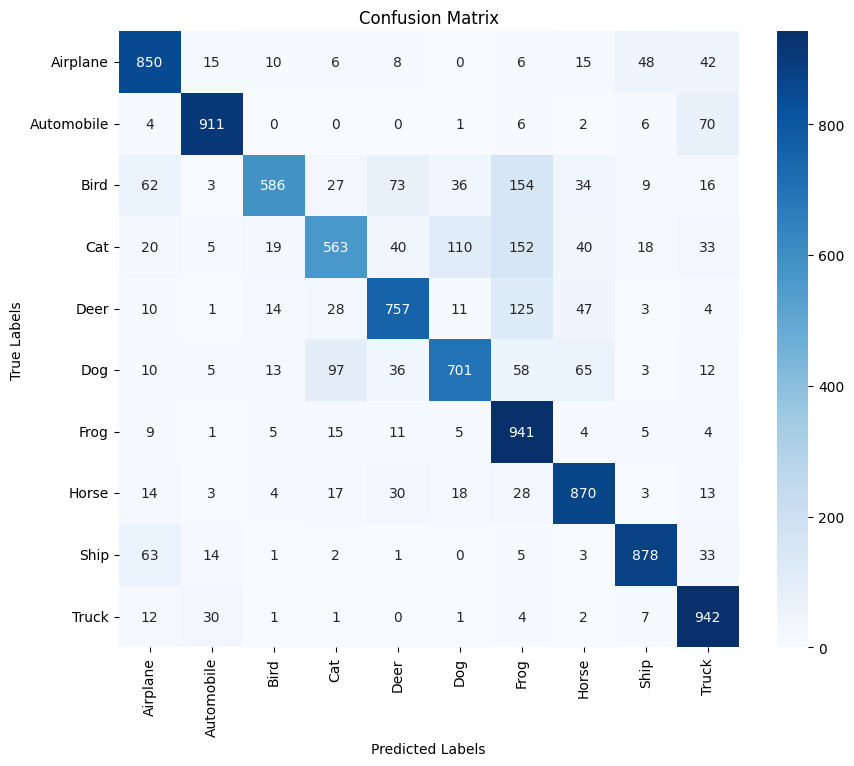

In [12]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_class)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

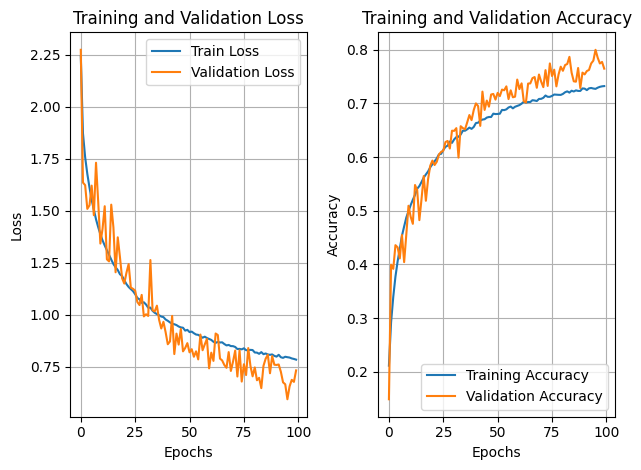

In [13]:
plt.figure()
# kayip grafikleri
plt.subplot(1, 2, 1) # 1 satir, 2 sutun, 1.subplot
plt.plot(history.history["loss"], label = "Train Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid()

# accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label = "Training Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()